In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [127]:
# read data
df = pd.read_csv("UK_Traffic_Accidents_2015.csv",low_memory= False)
df.head()  

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [224]:
# check shape of data
df.shape

(140056, 32)

In [4]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [5]:
df.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            27
Location_Northing_OSGR                           27
Longitude                                        27
Latitude                                         27
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             18
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

### Work Flow
- Missing Values
- Categorical features
- Relationship between Variables
- Outliers
- Scaling
- Feature Selection
- Model Building
- Model Evaluation/Testing



### 1.Missing Values

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140056 entries, 0 to 140055
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               140056 non-null  object 
 1   Location_Easting_OSGR                        140029 non-null  float64
 2   Location_Northing_OSGR                       140029 non-null  float64
 3   Longitude                                    140029 non-null  float64
 4   Latitude                                     140029 non-null  float64
 5   Police_Force                                 140056 non-null  int64  
 6   Accident_Severity                            140056 non-null  int64  
 7   Number_of_Vehicles                           140056 non-null  int64  
 8   Number_of_Casualties                         140056 non-null  int64  
 9   Date                                         140056 non-nul

In [6]:
df.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            27
Location_Northing_OSGR                           27
Longitude                                        27
Latitude                                         27
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             18
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [128]:
# visualize the missing data
# make a list of features with nan values
features_nan = [features for features in df.columns if df[features].isnull().sum() > 1]
# print % of missing values in features with nan
for feature in features_nan:
    print(feature,np.round(df[feature].isnull().mean(),4)," % missing values")

Location_Easting_OSGR 0.0002  % missing values
Location_Northing_OSGR 0.0002  % missing values
Longitude 0.0002  % missing values
Latitude 0.0002  % missing values
Time 0.0001  % missing values
LSOA_of_Accident_Location 0.0635  % missing values


<AxesSubplot:>

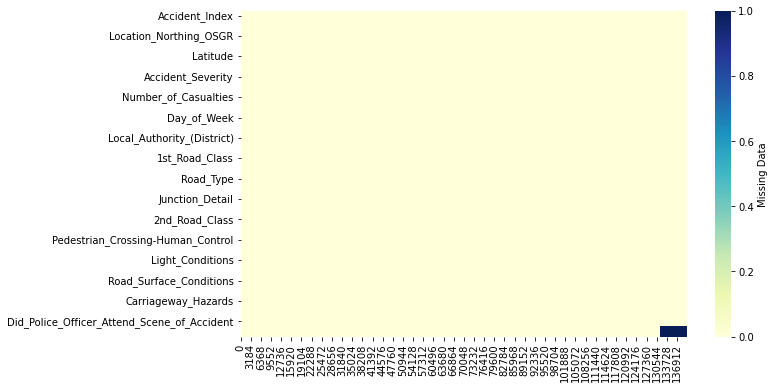

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})


In [12]:
#Lets deal with every column with missing values
features_nan

['Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Time',
 'LSOA_of_Accident_Location']

In [18]:
for feature in features_nan:
    print(feature,":",df[feature].isnull().sum())
    print("__________")
    print(feature,":",len(df[feature].unique()))

Location_Easting_OSGR : 27
__________
Location_Easting_OSGR : 89881
Location_Northing_OSGR : 27
__________
Location_Northing_OSGR : 93323
Longitude : 27
__________
Longitude : 133317
Latitude : 27
__________
Latitude : 131978
Time : 18
__________
Time : 1440
LSOA_of_Accident_Location : 8897
__________
LSOA_of_Accident_Location : 28738


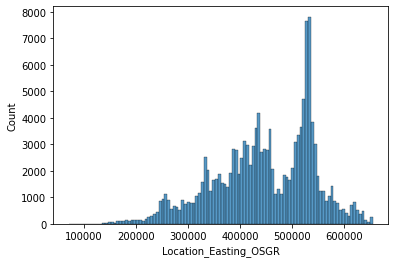

In [21]:
# Check the distribution of Location_Easting_OSGR  and Location_Northing_OSGR 
sns.histplot(df["Location_Easting_OSGR"])
plt.show()


In [129]:
"""With the size of the datasets and considering there basically negligibe amount of missing data in these columns,
I will fill the missing data in the numerical columns  with their median values"""
for feature in features_nan:
    if feature not in ["Time","LSOA_of_Accident_Location"]:
        median_value = df[feature].median()
        df[feature] = df[feature].fillna(median_value)
        
df.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             18
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [130]:
# Fill missing values in Time with mode
mode_value = df["Time"].mode()[0]
print(mode_value)
df["Time"] = df["Time"].fillna(mode_value)

17:00


In [82]:
df["Time"].isnull().sum()

0

In [131]:
# Filling the missing values in the time column
# I will first extract the hour of the day from the data
def get_hour(col):
    return str(col).split(':')[0]
    
df["Hour"] = df["Time"].apply(lambda x:get_hour(x))
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Hour
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,4,1,1,0,0,1,1,E01002825,18
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,1,1,1,0,0,1,1,E01002820,07
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,1,4,2,2,0,0,1,1,E01002833,18
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,1,1,2,0,0,1,2,E01002874,07
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,5,1,2,2,0,0,1,2,E01002814,07


In [132]:
df = df.drop("Time",axis = 1)

In [133]:
# Convert hour to interger
df["Hour"] = df["Hour"].astype(int)

In [134]:
#chage format of time
def change_hour_format(hr):
    if hr == 0:
        return '12am'
    elif hr <= 12:
        return str(hr)+"am"
    else:
        return str(hr - 12) + "pm"
df["Hour"] = df["Hour"].apply(lambda x:change_hour_format(x))
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Hour
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,4,1,1,0,0,1,1,E01002825,6pm
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,1,1,1,0,0,1,1,E01002820,7am
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,1,4,2,2,0,0,1,1,E01002833,6pm
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,1,1,2,0,0,1,2,E01002874,7am
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,5,1,2,2,0,0,1,2,E01002814,7am


In [135]:
df.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Control                                  0
2nd_Road_Cla

In [136]:
# Since there are thousands of missing values present in LSOA_of_Accident_Location,i will drop for now
df = df.drop(columns = "LSOA_of_Accident_Location",axis = 1)


In [89]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,6pm
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,7am
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,6pm
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,7am
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,7am


###  Categorical features

In [137]:
# Define categorical features
cat_features = [f for f in df.columns if df[f].dtype == "object"]
cat_features

['Accident_Index', 'Date', 'Local_Authority_(Highway)', 'Hour']

In [15]:
# Check unique values in each catgeorical features
for f in cat_features:
    print(f,":",len(df[f].unique()))

Accident_Index : 140056
Date : 365
Local_Authority_(Highway) : 207
Hour : 23


In [16]:
df["Local_Authority_(Highway)"].unique()

array(['E09000020', 'E09000033', 'E09000013', 'E09000001', 'E09000030',
       'E09000012', 'E09000028', 'E09000019', 'E09000007', 'E09000005',
       'E09000014', 'E09000003', 'E09000009', 'E09000018', 'E09000031',
       'EHEATHROW', 'E09000017', 'E09000026', 'E09000025', 'E09000002',
       'E09000016', 'E09000022', 'E09000006', 'E09000008', 'E09000032',
       'E09000023', 'E09000011', 'E09000004', 'E09000015', 'E09000010',
       'E09000021', 'E09000029', 'E09000024', 'E09000027', 'E10000006',
       'E06000008', 'E10000017', 'E06000009', 'E08000012', 'E08000015',
       'E08000014', 'E08000013', 'E08000011', 'E08000003', 'E08000006',
       'E08000008', 'E08000007', 'E08000001', 'E08000010', 'E08000009',
       'E08000002', 'E08000005', 'E08000004', 'E06000007', 'E06000050',
       'E06000049', 'E06000006', 'E06000048', 'E08000021', 'E08000020',
       'E08000024', 'E08000023', 'E08000022', 'E06000047', 'E06000005',
       'E10000023', 'E06000014', 'E08000035', 'E08000034', 'E080

In [138]:
# Since we tried as much as possible to know the the meaning of the location highway,but we could not find one,it will be dropped for now
df = df.drop("Local_Authority_(Highway)",axis = 1)

In [20]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Hour', 'Month'],
      dtype='object')

In [139]:
# Extract Month from date column
def get_month(col):
    return col.split('/')[1]
    
df["Month"] = df["Date"].apply(lambda x:get_month(x))
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,4,1,1,0,0,1,1,6pm,01
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,1,1,1,0,0,1,1,7am,01
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,1,4,2,2,0,0,1,1,6pm,01
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,1,1,2,0,0,1,2,7am,01
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,5,1,2,2,0,0,1,2,7am,01


In [140]:
df["Month"] = df["Month"].astype("int")

In [ ]:
# We really dont know much about the Local_Authority_(Highway),i will leave that for now


In [94]:
df.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-

### Numerical features


In [141]:
num_features = [f for f in df.columns if df[f].dtype == "int64" or df[f].dtype == "int32" or df[f].dtype == "float"]
num_features

['Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Day_of_Week',
 'Local_Authority_(District)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Month']

In [18]:
for f in num_features:
    print(f,":",len(df[f].unique()))
# There are both discreate and numerical features based on the numberv of unique values,lets divide them

Location_Easting_OSGR : 89880
Location_Northing_OSGR : 93322
Longitude : 133316
Latitude : 131977
Police_Force : 51
Accident_Severity : 3
Number_of_Vehicles : 16
Number_of_Casualties : 22
Day_of_Week : 7
Local_Authority_(District) : 380
1st_Road_Class : 6
1st_Road_Number : 4340
Road_Type : 6
Speed_limit : 8
Junction_Detail : 10
Junction_Control : 5
2nd_Road_Class : 7
2nd_Road_Number : 3795
Pedestrian_Crossing-Human_Control : 4
Pedestrian_Crossing-Physical_Facilities : 7
Light_Conditions : 5
Weather_Conditions : 9
Road_Surface_Conditions : 6
Special_Conditions_at_Site : 9
Carriageway_Hazards : 7
Urban_or_Rural_Area : 2
Did_Police_Officer_Attend_Scene_of_Accident : 4
Month : 12


In [19]:
# Discreate Numerical features
discrete_num = [f for f in num_features if len(df[f].unique()) <= 25]
discrete_num

['Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Day_of_Week',
 '1st_Road_Class',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Month']

In [20]:
for f in discrete_num:
    print(f,":",df[f].unique())

Accident_Severity : [3 2 1]
Number_of_Vehicles : [ 1  2  3  4  5  6  8  7 10  9 12 16 11 37 14 13]
Number_of_Casualties : [ 1  2  3  6  4  5 11  8  9  7 17 13 10 16 12 14 21 38 36 34 35 24]
Day_of_Week : [2 3 6 5 1 4 7]
1st_Road_Class : [5 6 4 3 1 2]
Road_Type : [6 1 3 2 7 9]
Speed_limit : [30 50 40 20 10 70 60  0]
Junction_Detail : [ 3  2  6  0  8  1  7  9  5 -1]
Junction_Control : [ 4  2 -1  3  1]
2nd_Road_Class : [ 6  3  5 -1  4  1  2]
Pedestrian_Crossing-Human_Control : [ 0  1  2 -1]
Pedestrian_Crossing-Physical_Facilities : [ 0  1  5  4  8  7 -1]
Light_Conditions : [4 1 6 7 5]
Weather_Conditions : [1 2 8 7 5 9 4 6 3]
Road_Surface_Conditions : [ 1  2  4  3  5 -1]
Special_Conditions_at_Site : [ 0  4  2  1  6  5  3  7 -1]
Carriageway_Hazards : [ 0  2  6  7  1  3 -1]
Urban_or_Rural_Area : [1 2]
Did_Police_Officer_Attend_Scene_of_Accident : [ 1  2  3 -1]
Month : [ 1  2  3  5  4  6  7  8  9 10 11 12]


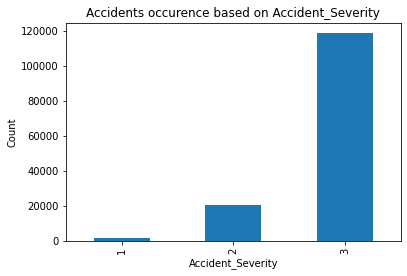

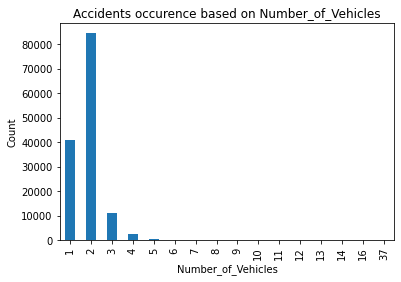

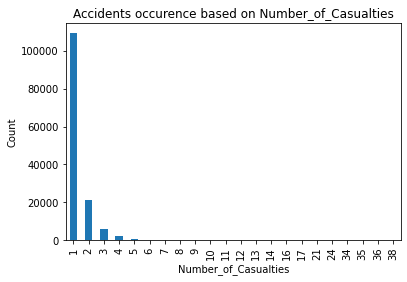

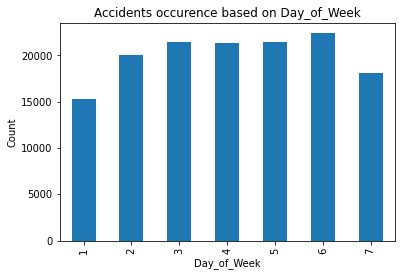

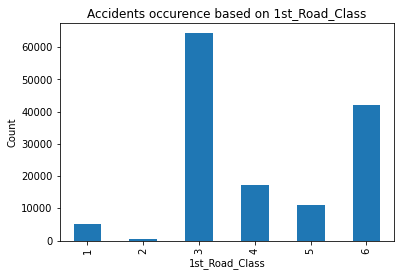

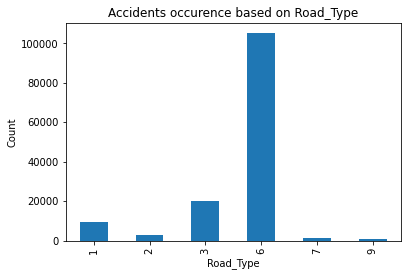

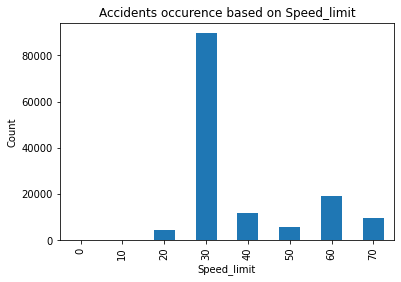

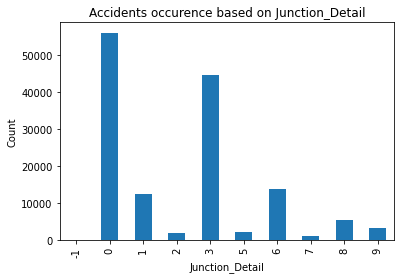

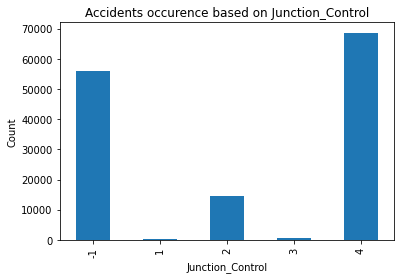

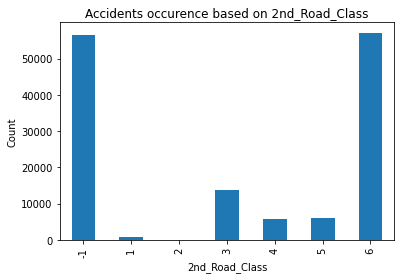

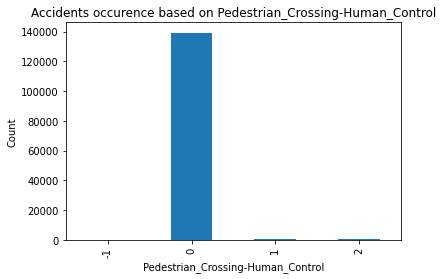

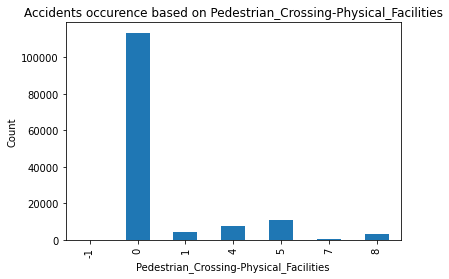

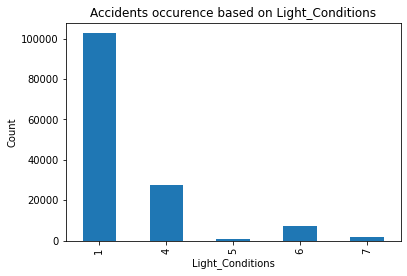

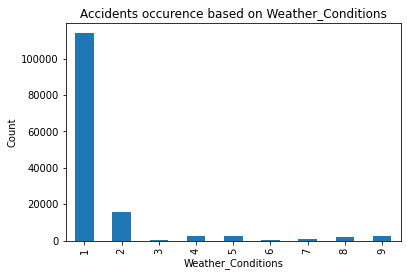

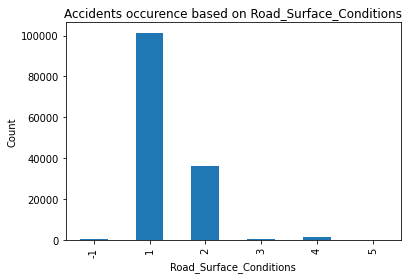

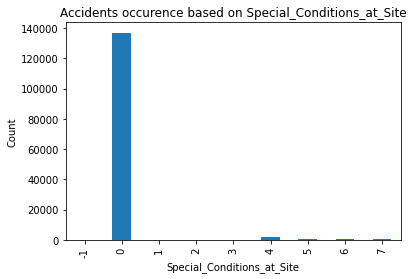

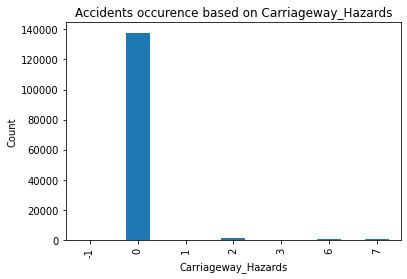

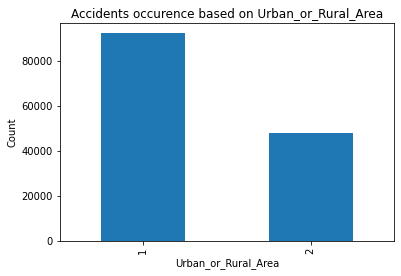

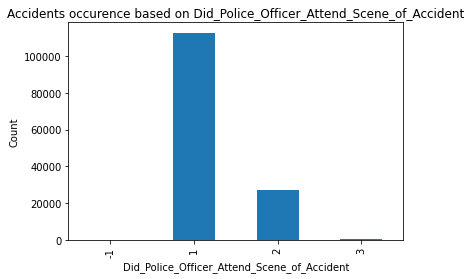

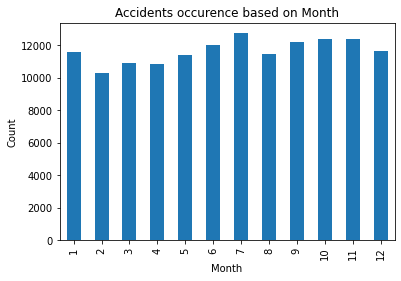

In [94]:
for feature in discrete_num:
    data = df.copy()
    data.groupby(feature)[feature].count().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title("Accidents occurence based on "+feature)
    plt.show()

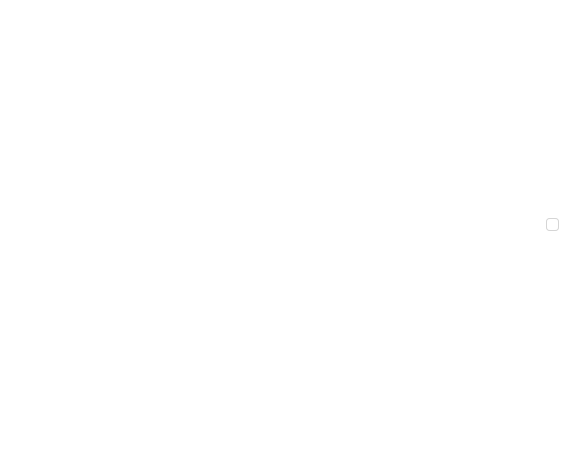

In [29]:
speed_zone_accidents = df.loc[df['Speed_limit'].isin(['20' ,'30' ,'40' ,'50' ,'60' ,'70'])]
speed  = speed_zone_accidents.Speed_limit.value_counts()

explode = (0.0, 0.0, 0.0 , 0.0 ,0.0,0.0) 
plt.figure(figsize=(10,8))
plt.pie(speed.values,  labels=None, 
        autopct='%.1f',pctdistance=0.8, labeldistance=1.9, shadow=False, startangle=160,textprops={'fontsize': 15})
 
plt.axis('equal')
plt.legend(speed.index, loc="center right", fontsize=15, 
           bbox_transform=plt.gcf().transFigure)
#plt.figtext(.5,.9,'Accidents percentage in Speed Zone', fontsize=25, ha='center')
plt.show()

In [21]:
# Conitous numerical features
cont_num = [f for f in num_features if f not in discrete_num]
cont_num

['Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Local_Authority_(District)',
 '1st_Road_Number',
 '2nd_Road_Number']

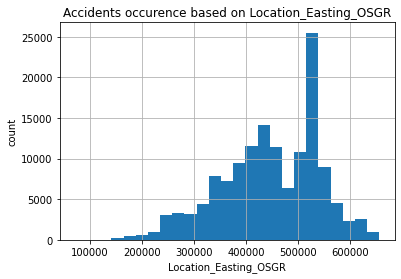

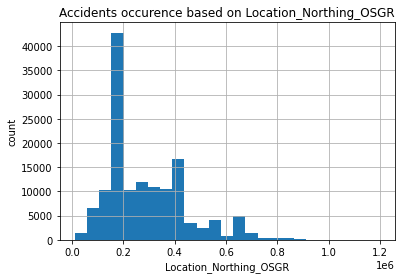

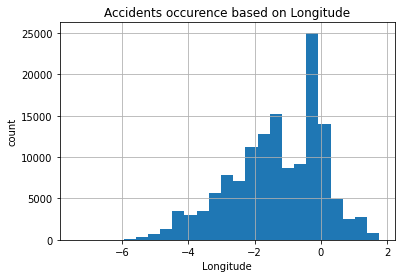

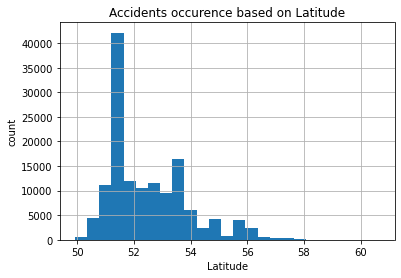

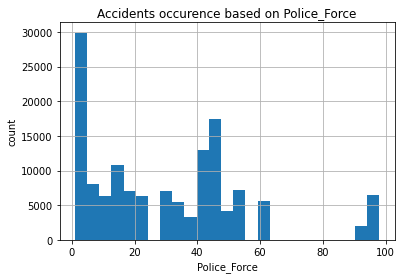

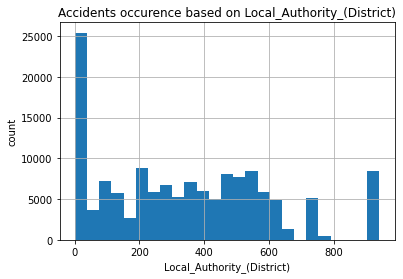

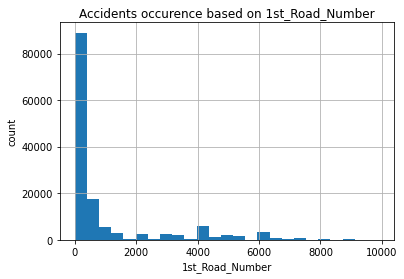

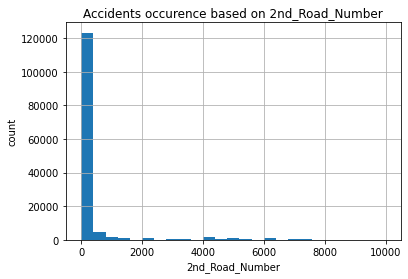

In [31]:
for feature in cont_num:
    data = df.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title("Accidents occurence based on "+feature)
    plt.show()

In [98]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Month
count,140056.000000,1.400560e+05,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,...,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000
mean,446914.772484,2.898948e+05,-1.330440,52.496658,29.902046,2.833852,1.841014,1.329390,4.094962,343.648905,...,0.007197,0.838807,1.952041,1.511531,1.298866,0.098839,0.061754,1.342549,1.198506,6.631697
std,94884.137918,1.577795e+05,1.393451,1.420861,25.217637,0.402020,0.710046,0.795427,1.911279,258.438367,...,0.123806,1.931975,1.653867,1.519799,0.554714,0.697925,0.574448,0.474564,0.405991,3.429448
min,70860.000000,1.062800e+04,-7.422915,49.915618,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000
25%,385630.000000,1.766400e+05,-2.215811,51.475224,6.000000,3.000000,1.000000,1.000000,2.000000,104.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4.000000
50%,451460.000000,2.408860e+05,-1.236156,52.051875,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,7.000000
75%,526760.000000,3.911590e+05,-0.172579,53.414467,45.000000,3.000000,2.000000,1.000000,6.000000,517.000000,...,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000,10.000000
max,655282.000000,1.197917e+06,1.758443,60.661117,98.000000,3.000000,37.000000,38.000000,7.000000,941.000000,...,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,2.000000,3.000000,12.000000


In [248]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,4,1,1,0,0,1,1,6pm,1
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,1,1,1,0,0,1,1,7am,1
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,1,4,2,2,0,0,1,1,6pm,1
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,1,1,2,0,0,1,2,7am,1
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,5,1,2,2,0,0,1,2,7am,1


In [142]:
# Drop unnecessary columns
df = df.drop(["Accident_Index","Date"],axis = 1)
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month
0,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,2,12,...,0,4,1,1,0,0,1,1,6pm,1
1,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,2,12,...,0,1,1,1,0,0,1,1,7am,1
2,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,2,12,...,1,4,2,2,0,0,1,1,6pm,1
3,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,3,12,...,0,1,1,2,0,0,1,2,7am,1
4,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,6,12,...,5,1,2,2,0,0,1,2,7am,1


C:\Users\user\anaconda3\envs\hamoye\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location_Northing_OSGR'>

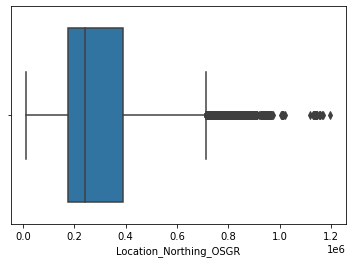

In [107]:
sns.boxplot(df["Location_Northing_OSGR"])

since all these continuous features specify a particular loaction, i will leave the outliers for now

In [32]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,4,1,1,0,0,1,1,6pm,1
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,1,1,1,0,0,1,1,7am,1
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,1,4,2,2,0,0,1,1,6pm,1
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,1,1,2,0,0,1,2,7am,1
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,5,1,2,2,0,0,1,2,7am,1


In [34]:
!pip install geopy

In [35]:
from geopy.geocoders import Nominatim
from geopy.point import Point
# instantiate Nomminatim APi
geolocator = Nominatim(user_agent="geoapiExercises")

In [111]:
!pip install -U scikit-learn

     ---------------------------------------- 7.4/7.4 MB 117.6 kB/s eta 0:00:00
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [40]:

"""def city_state_country(row):
    coord = f"{row['Latitude']}, {row['Longitude']}"
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    #country = address.get('country', '')
    #row['city'] = city
    row['state'] = state
    #row['country'] = country
    return row   

df = df.apply(city_state_country, axis=1)
print(df)"""

'def city_state_country(row):\n    coord = f"{row[\'Latitude\']}, {row[\'Longitude\']}"\n    location = geolocator.reverse(coord, exactly_one=True)\n    address = location.raw[\'address\']\n    city = address.get(\'city\', \'\')\n    state = address.get(\'state\', \'\')\n    #country = address.get(\'country\', \'\')\n    #row[\'city\'] = city\n    row[\'state\'] = state\n    #row[\'country\'] = country\n    return row   \n\ndf = df.apply(city_state_country, axis=1)\nprint(df)'

In [143]:
# Encode the hour column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Hour"] = le.fit_transform(df["Hour"])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [144]:
mapping

{'10am': 0,
 '10pm': 1,
 '11am': 2,
 '11pm': 3,
 '12am': 4,
 '1am': 5,
 '1pm': 6,
 '2am': 7,
 '2pm': 8,
 '3am': 9,
 '3pm': 10,
 '4am': 11,
 '4pm': 12,
 '5am': 13,
 '5pm': 14,
 '6am': 15,
 '6pm': 16,
 '7am': 17,
 '7pm': 18,
 '8am': 19,
 '8pm': 20,
 '9am': 21,
 '9pm': 22}

In [146]:
import json
with open("hourLabel.json","w") as fp:
    json.dump(mapping,fp)

In [44]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,4,1,1,0,0,1,1,16,1
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,1,1,1,0,0,1,1,17,1
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,1,4,2,2,0,0,1,1,16,1
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,1,1,2,0,0,1,2,17,1
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,5,1,2,2,0,0,1,2,17,1


### Outliers


C:\Users\user\anaconda3\envs\hamoye\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location_Easting_OSGR'>

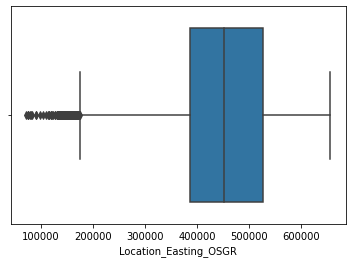

In [45]:
### plot boxplot
sns.boxplot(df["Location_Easting_OSGR"])

C:\Users\user\anaconda3\envs\hamoye\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location_Northing_OSGR'>

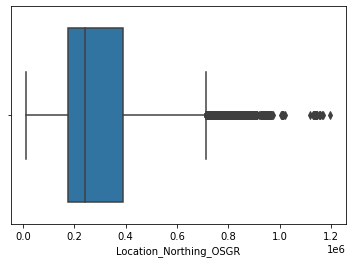

In [46]:
sns.boxplot(df["Location_Northing_OSGR"])

C:\Users\user\anaconda3\envs\hamoye\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Longitude'>

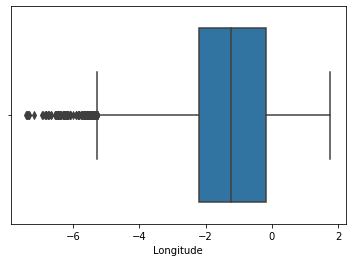

In [48]:
sns.boxplot(df["Latitud"])

C:\Users\user\anaconda3\envs\hamoye\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Longitude'>

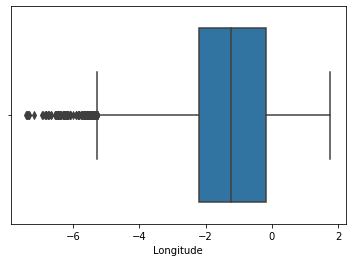

In [50]:
sns.boxplot(df["Longitude"])

### Removing Outliers


In [147]:
# Remove outlliers from Location_Easting_OSGR by repa
outliers = []
q1 = df["Location_Easting_OSGR"].quantile(0.25)
q3 = df["Location_Easting_OSGR"].quantile(0.75)
iqr = q3-q1
lower_tail =  q1 - 1.5*iqr
upper_tail = q3 + 1.5 * iqr
for i in df["Location_Easting_OSGR"]:
    if (i  > upper_tail) or (i < lower_tail):
        outliers.append(i)


In [148]:
len(outliers)

432

In [149]:
for i in outliers:
     df["Location_Easting_OSGR"] = df["Location_Easting_OSGR"].replace(i,np.median(df["Location_Easting_OSGR"]))

C:\Users\user\anaconda3\envs\hamoye\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


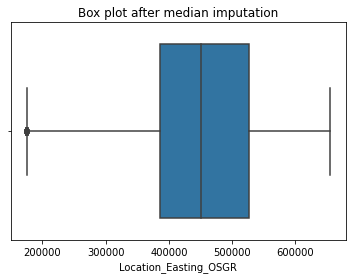

In [150]:
sns.boxplot(df['Location_Easting_OSGR'])
plt.title("Box plot after median imputation")
plt.show()

In [151]:
# Removing outliers for Location_Northing_OSGR
outliers = []
q1 = df["Location_Northing_OSGR"].quantile(0.25)
q3 = df["Location_Northing_OSGR"].quantile(0.75)
iqr = q3-q1
lower_tail =  q1 - 1.5*iqr
upper_tail = q3 + 1.5 * iqr
for i in df["Location_Northing_OSGR"]:
    if (i  > upper_tail) or (i < lower_tail):
        outliers.append(i)

In [152]:
len(outliers)

1665

In [153]:
for i in outliers:
     df["Location_Northing_OSGR"] = df["Location_Northing_OSGR"].replace(i,np.median(df["Location_Northing_OSGR"]))

C:\Users\user\anaconda3\envs\hamoye\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


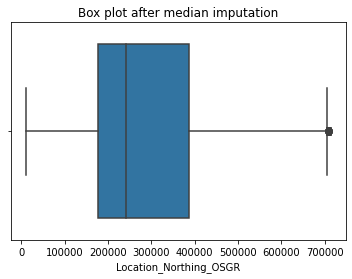

In [154]:
sns.boxplot(df['Location_Northing_OSGR'])
plt.title("Box plot after median imputation")
plt.show()

In [155]:
# Removing outliers for Latitude
outliers = []
q1 = df["Latitude"].quantile(0.25)
q3 = df["Latitude"].quantile(0.75)
iqr = q3-q1
lower_tail =  q1 - 1.5*iqr
upper_tail = q3 + 1.5 * iqr
for i in df["Latitude"]:
    if (i  > upper_tail) or (i < lower_tail):
        outliers.append(i)

In [156]:
len(outliers)

1640

In [157]:
for i in outliers:
     df["Latitude"] = df["Latitude"].replace(i,np.median(df["Latitude"]))

C:\Users\user\anaconda3\envs\hamoye\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


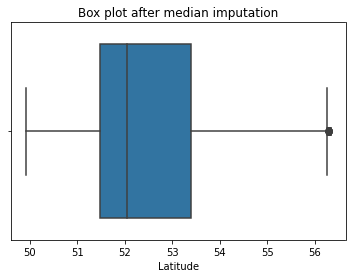

In [158]:
sns.boxplot(df['Latitude'])
plt.title("Box plot after median imputation")
plt.show()

In [159]:
# Removing outliers for Longitude
outliers = []
q1 = df["Longitude"].quantile(0.25)
q3 = df["Longitude"].quantile(0.75)
iqr = q3-q1
lower_tail =  q1 - 1.5*iqr
upper_tail = q3 + 1.5 * iqr
for i in df["Longitude"]:
    if (i  > upper_tail) or (i < lower_tail):
        outliers.append(i)

In [160]:
len(outliers)

384

In [161]:
for i in outliers:
     df["Longitude"] = df["Longitude"].replace(i,np.median(df["Longitude"]))

C:\Users\user\anaconda3\envs\hamoye\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


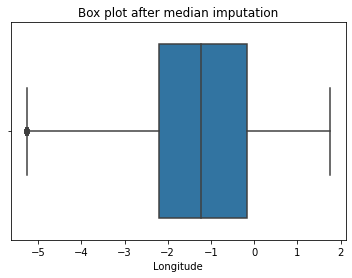

In [162]:
sns.boxplot(df['Longitude'])
plt.title("Box plot after median imputation")
plt.show()

In [114]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Hour', 'Month'],
      dtype='object')

In [115]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month
count,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,...,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000
mean,447827.034436,283159.068930,-1.318349,52.436849,29.902046,2.833852,1.841014,1.329390,4.094962,343.648905,...,0.838807,1.952041,1.511531,1.298866,0.098839,0.061754,1.342549,1.198506,11.650647,6.631697
std,93486.685943,147062.961595,1.374770,1.325850,25.217637,0.402020,0.710046,0.795427,1.911279,258.438367,...,1.931975,1.653867,1.519799,0.554714,0.697925,0.574448,0.474564,0.405991,6.508139,3.429448
min,173944.000000,10628.000000,-5.280261,49.915618,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,1.000000
25%,386460.000000,176640.000000,-2.204238,51.475224,6.000000,3.000000,1.000000,1.000000,2.000000,104.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,6.000000,4.000000
50%,451460.000000,240886.000000,-1.236156,52.051875,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,12.000000,7.000000
75%,526760.000000,388030.000000,-0.172579,53.386988,45.000000,3.000000,2.000000,1.000000,6.000000,517.000000,...,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000,17.000000,10.000000
max,655282.000000,712921.000000,1.758443,56.323221,98.000000,3.000000,37.000000,38.000000,7.000000,941.000000,...,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,2.000000,3.000000,22.000000,12.000000


In [163]:
df.to_csv("processed_df.csv",index=False)

###  Chi-Square Test between response feature and other categorical features
The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.
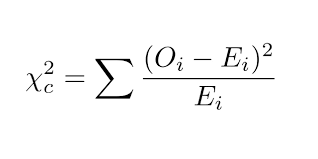

In [ ]:
# Convert some columns with integer as data types to object
cols = ['Day_of_Week', 'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Hour', 'Month']

for feature in cols:
    df[feature] = df[feature].astype("object")

In [59]:
import scipy.stats as stat

In [82]:
cols   

['Day_of_Week',
 'Local_Authority_(District)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Hour',
 'Month']

In [95]:
dataset_table=pd.crosstab(df["Light_Conditions"],df['Accident_Severity'])
Observed_Values = dataset_table.values 
print(Observed_Values)
val=stat.chi2_contingency(dataset_table)
print(val)
Expected_Values=val[3]
print(Expected_Values)
print(dataset_table.shape[0])
type(dataset_table)

[[  968 14017 87623]
 [  290  4086 23175]
 [   15   137   567]
 [  308  1523  5427]
 [   35   275  1610]]
(1022.1549416610997, 2.464536902872151e-215, 8, array([[1.18391592e+03, 1.46802644e+04, 8.67438197e+04],
       [3.17890101e+02, 3.94175857e+03, 2.32913513e+04],
       [8.29599589e+00, 1.02868296e+02, 6.07835709e+02],
       [8.37445593e+01, 1.03841181e+03, 6.13584363e+03],
       [2.21534243e+01, 2.74696978e+02, 1.62314960e+03]]))
[[1.18391592e+03 1.46802644e+04 8.67438197e+04]
 [3.17890101e+02 3.94175857e+03 2.32913513e+04]
 [8.29599589e+00 1.02868296e+02 6.07835709e+02]
 [8.37445593e+01 1.03841181e+03 6.13584363e+03]
 [2.21534243e+01 2.74696978e+02 1.62314960e+03]]
5


pandas.core.frame.DataFrame

In [87]:
cols = np.array(cols)
chi_square_df = pd.DataFrame(cols,columns = ["Feature"])
chi_square_df.head()

,Feature
0,Day_of_Week
1,Local_Authority_(District)
2,1st_Road_Class
3,1st_Road_Number
4,Road_Type


In [115]:
cols = np.array(cols)
null_hypothesis = []
all_p_value = []
all_chi_square_stat = []
all_critical_value = []
from scipy.stats import chi2
def chi_test(cols):
    for feature in cols:
        dataset_table=pd.crosstab(df[feature],df['Accident_Severity'])
        Observed_Values = dataset_table.values 
        #print(Observed_Values)
        val=stat.chi2_contingency(dataset_table)
        Expected_Values=val[3]
        no_of_rows=dataset_table.shape[0]
        no_of_columns=dataset_table.shape[1]
        ddof=(no_of_rows-1)*(no_of_columns-1)
        chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
        chi_square_statistic=chi_square[0]+chi_square[1]
        alpha = 0.05
        p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
        critical_value=chi2.ppf(q=1-alpha,df=ddof)
        all_p_value.append(p_value)
        all_chi_square_stat.append(chi_square_statistic)
        all_critical_value.append(critical_value)
        if chi_square_statistic>=critical_value:
            null_hypothesis.append("True")
        else:
            null_hypothesis.append("False")
                
                
        #print("Degree of Freedom:-",ddof)
     
        #critical_value=chi2.ppf(q=1-alpha,df=ddof)
        
        #chi_square_df["P Value"] = np.array(all_p_value)
        #chi_square_df["Chi_square_statistic"] = np.array(all_chi_square_stat)
chi_test(cols)

        
     

In [107]:
len(all_p_value)

21

In [108]:
len(all_chi_square_stat)

21

In [116]:
chi_square_df["P-Value"] = all_p_value
chi_square_df["Chi-Square Stats"] =  all_chi_square_stat
chi_square_df["Critical Value"] = all_critical_value
chi_square_df["Null hypothesis"] = null_hypothesis
chi_square_df.head()


,Feature,P-Value,Chi-Square Stats,Critical Value,Null hypothesis
0,Day_of_Week,0.0,217.925216,21.026070,True
1,Local_Authority_(District),0.0,3701.634944,823.160478,True
2,1st_Road_Class,0.0,258.059255,18.307038,True
3,1st_Road_Number,0.0,10634.205532,8895.827648,True
4,Road_Type,0.0,333.676473,18.307038,True


Comment:Based on the test,it shows there is a strong relationship between the response and the other variables,this might beacuse the response variable in imbalanced

In [ ]:
# The condition is stated below
"""if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:"""

In [113]:
len(cols)

21

In [141]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month
0,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,2,12,...,0,4,1,1,0,0,1,1,16,1
1,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,2,12,...,0,1,1,1,0,0,1,1,17,1
2,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,2,12,...,1,4,2,2,0,0,1,1,16,1
3,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,3,12,...,0,1,1,2,0,0,1,2,17,1
4,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,6,12,...,5,1,2,2,0,0,1,2,17,1


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140056 entries, 0 to 140055
Data columns (total 29 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Location_Easting_OSGR                        140056 non-null  float64
 1   Location_Northing_OSGR                       140056 non-null  float64
 2   Longitude                                    140056 non-null  float64
 3   Latitude                                     140056 non-null  float64
 4   Police_Force                                 140056 non-null  int64  
 5   Accident_Severity                            140056 non-null  int64  
 6   Number_of_Vehicles                           140056 non-null  int64  
 7   Number_of_Casualties                         140056 non-null  int64  
 8   Day_of_Week                                  140056 non-null  object 
 9   Local_Authority_(District)                   140056 non-nul

In [43]:
""" Feature selcetion
from sklearn.feature_selection import mutual_info_classif
X = df.drop("Accident_Severity",axis = 1)
y = df["Accident_Severity"]

def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y,)
mi_scores[::3]  # show a few features with their MI scores"""

' Feature selcetion\nfrom sklearn.feature_selection import mutual_info_classif\nX = df.drop("Accident_Severity",axis = 1)\ny = df["Accident_Severity"]\n\ndef make_mi_scores(X, y):\n    mi_scores = mutual_info_classif(X, y)\n    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)\n    mi_scores = mi_scores.sort_values(ascending=False)\n    return mi_scores\n\nmi_scores = make_mi_scores(X, y,)\nmi_scores[::3]  # show a few features with their MI scores'

In [144]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Hour', 'Month'],
      dtype='object')

### Training

In [3]:
df= pd.read_csv("processed_df.csv")
df.isnull().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions    

In [4]:
data = df.copy()

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import RandomOverSampler,SMOTE
splitter = StratifiedShuffleSplit(n_splits=10,random_state = 42,test_size=0.2)
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [53]:
data = df.copy()

### Building Custom Cross validation Function
   - Log down continous numerical features
    - Scaling
    - Apply StratifiedShuffleSplit to preserve the percentage of each class
    - Oversample and Undersample to handle imbalance

In [54]:
# Custom Model Building Function
def cross_validate_model(df,model,log_features = True,scaler =MinMaxScaler(),sampler=SMOTE(),scoring="f1_weighted"):
    if log_features == True:
        features_to_log = ['Location_Easting_OSGR','Location_Northing_OSGR',"Latitude"]
        for i in features_to_log:
                df[i] = np.log(df[i])
    X = df.drop("Accident_Severity",axis=1)
    Y = df["Accident_Severity"]
    x_cols = X.columns
    for feature in x_cols:
        X[feature] = scaler.fit_transform(X[[feature]])
    
    splitter = StratifiedShuffleSplit(n_splits=5,random_state = 42,test_size=0.2)
    for train,test in splitter.split(X,Y):
        x_train = X.loc[train]
        y_train = Y.loc[train] - 1
        x_test = X.loc[test] 
        y_test = Y.loc[test]-1 
    undersample = RandomUnderSampler()
    #oversample = SMOTE()
    steps = [("o",sampler),("u",undersample)]
    pipeline = Pipeline(steps = steps)
    x,y = pipeline.fit_resample(x_train,y_train)
    score = cross_validate(model,x,y,cv=5, scoring = "f1_weighted")
    print("F1 Cv score:",score)
    

### Cross validation with Logistic Regression

In [52]:
cross_validate_build_model(data,model = LogisticRegression(max_iter=1000))

F1 Cv score: {'fit_time': array([72.22406697, 65.65842319, 56.99803352, 58.23676729, 62.41950703]), 'score_time': array([0.31871963, 0.07477689, 0.07812786, 0.07813001, 0.07812762]), 'test_score': array([0.51648017, 0.51814875, 0.5166239 , 0.52298059, 0.52128949])}


In [204]:
print("Logistic reg cv score:",score)

Logistic reg cv score: CV scores:{'fit_time': array([59.79986787, 60.20754504, 64.71963692, 57.67605853, 66.93648005]), 'score_time': array([0.09375072, 0.07812357, 0.09375143, 0.07812691, 0.08793783]), 'test_score': array([0.5149607 , 0.51725242, 0.52255605, 0.51949659, 0.52196424])}


### Cross validation with Random Forest


In [56]:
data = df.copy()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
model = RandomForestClassifier(random_state=42)

In [57]:
cross_validate_model(data,model = model,scoring="f1_weighted")

F1 Cv score: {'fit_time': array([315.69096971, 301.03108311, 289.71841049, 293.90522647,
       287.7836585 ]), 'score_time': array([7.1056335 , 7.01590419, 7.29739285, 7.0286808 , 7.09390426]), 'test_score': array([0.92669073, 0.94066067, 0.93999638, 0.94025294, 0.94124419])}


### Cross validation with  Xgboost

In [55]:
data = df.copy()
from xgboost import XGBClassifier
model = XGBClassifier()
cross_validate_model(data,model = model)

F1 Cv score: {'fit_time': array([177.55602098, 178.20557523, 172.57691264, 172.02077413,
       168.34925389]), 'score_time': array([1.07467914, 0.3812716 , 0.34063888, 0.35713792, 0.33752966]), 'test_score': array([0.85565895, 0.87760527, 0.87955761, 0.87869435, 0.876325  ])}


### Training Data With XGboost

In [10]:
from xgboost import XGBClassifier
model = XGBClassifier()
def train_model(df,model,log_features=True,scaler=MinMaxScaler()):
    if log_features == True:
        features_to_log = ['Location_Easting_OSGR','Location_Northing_OSGR',"Latitude"]
        for i in features_to_log:
                df[i] = np.log(df[i])
    X = df.drop("Accident_Severity",axis=1)
    #X = X[features_selected]
    Y = df["Accident_Severity"]
    x_cols = X.columns
    for feature in x_cols:
        X[feature] = scaler.fit_transform(X[[feature]])
    
    splitter = StratifiedShuffleSplit(n_splits=5,random_state = 42,test_size=0.2)
    for train,test in splitter.split(X,Y):
        x_train = X.loc[train]
        y_train = Y.loc[train] - 1
        x_test = X.loc[test] 
        y_test = Y.loc[test]- 1 
    undersample = RandomUnderSampler()
    oversample = SMOTE()
    steps = [("o",oversample),("u",undersample)]
    pipeline = Pipeline(steps = steps)
    x,y = pipeline.fit_resample(x_train,y_train)
    model.fit(x,y)
    preds = model.predict(x_test)
    return model,preds,y_test


In [11]:
data = df.copy()
model,predictions,true_values = train_model(data,model)

In [13]:
from sklearn.metrics import classification_report
cp = classification_report(true_values,predictions)
print(cp)  


              precision    recall  f1-score   support

           0       0.24      0.03      0.05       323
           1       0.40      0.02      0.04      4008
           2       0.85      0.99      0.92     23681

    accuracy                           0.84     28012
   macro avg       0.50      0.35      0.34     28012
weighted avg       0.78      0.84      0.78     28012



In [38]:
labels = [0,1,2]
target_names = ["Fatal","Serious","Slight"]

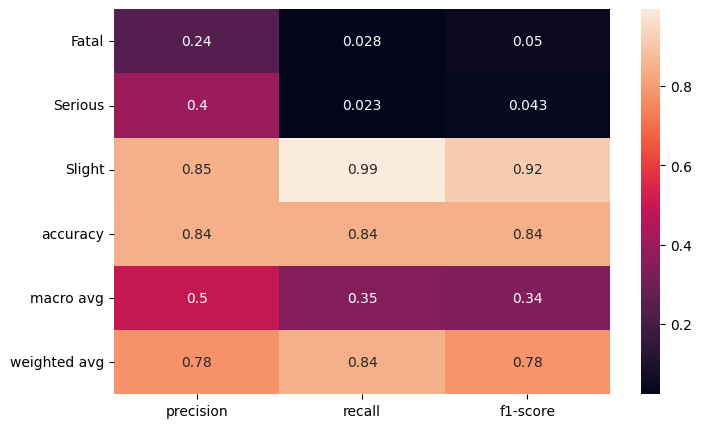

In [44]:
clf_report = classification_report(true_values,
                                   predictions,
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)
plt.figure(figsize=(8,5))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.savefig("xgb_all_features_class_report.png")
plt.show()

In [45]:
import pickle
with open('xgb_all_features.pkl', 'wb') as files:
    pickle.dump(model, files)

### Training with RandomForest

In [46]:
data = df.copy()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
rfc = RandomForestClassifier(random_state=42)

In [47]:
rfc,predictions,true_values = train_model(data,model)

In [48]:
from sklearn.metrics import classification_report
cp = classification_report(true_values,predictions)
print(cp) 

              precision    recall  f1-score   support

           0       0.19      0.02      0.04       323
           1       0.33      0.02      0.03      4008
           2       0.85      0.99      0.92     23681

    accuracy                           0.84     28012
   macro avg       0.46      0.35      0.33     28012
weighted avg       0.77      0.84      0.78     28012



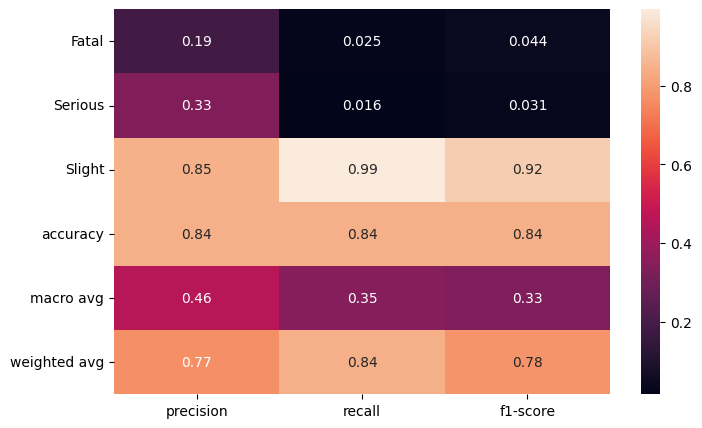

In [49]:
clf_report = classification_report(true_values,
                                   predictions,
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)
plt.figure(figsize=(8,5))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.savefig("random_forest_all_features_class_report.png")
plt.show()

In [50]:
import pickle
with open('random_forest_all_features.pkl', 'wb') as files:
    pickle.dump(rfc, files)

### Training with Catboost

In [52]:
import catboost
from catboost import CatBoostClassifier
clf = CatBoostClassifier() 
cbc,predictions,true_values = train_model(data,model)

In [53]:
from sklearn.metrics import classification_report
cp = classification_report(true_values,predictions)
print(cp) 

              precision    recall  f1-score   support

           0       0.20      0.02      0.04       323
           1       0.43      0.02      0.04      4008
           2       0.85      1.00      0.92     23681

    accuracy                           0.84     28012
   macro avg       0.49      0.35      0.33     28012
weighted avg       0.78      0.84      0.78     28012



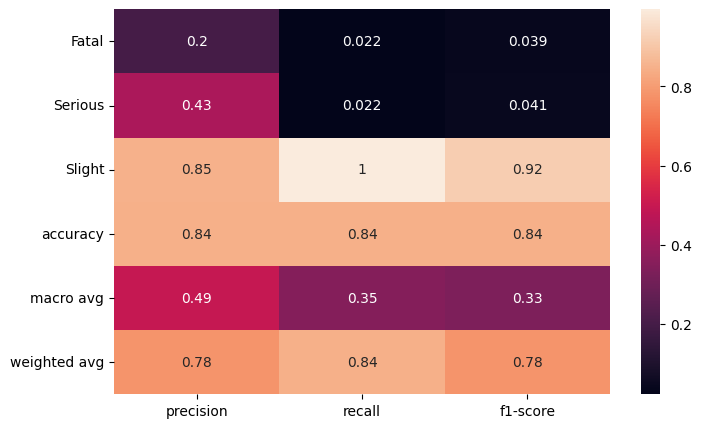

In [54]:
clf_report = classification_report(true_values,
                                   predictions,
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)
plt.figure(figsize=(8,5))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.savefig("catboost_all_features_class_report.png")
plt.show()

In [55]:
#save model
import pickle
with open('catboost_all_features.pkl', 'wb') as files:
    pickle.dump(cbc, files)

### Feature Selection
**Random Forest and xgboost gives a pretty good result with radom forest having the higher f1_score
- Perform feature selection with Random Forest
- Perform feature selection with xgbosst
- Train and evaluate each model on selected features
- Selecet the better model


### Build custom feature Selection function

In [56]:
from sklearn.feature_selection import SelectFromModel
def select_features(df,model,log_features=True,scaler = MinMaxScaler()):
    if log_features == True:
        features_to_log = ['Location_Easting_OSGR','Location_Northing_OSGR',"Latitude"]
        for i in features_to_log:
                df[i] = np.log(df[i])
    X = df.drop("Accident_Severity",axis=1)
    Y = df["Accident_Severity"]
    x_cols = X.columns
    for feature in x_cols:
        X[feature] = scaler.fit_transform(X[[feature]])
    
    splitter = StratifiedShuffleSplit(n_splits=5,random_state = 42,test_size=0.2)
    for train,test in splitter.split(X,Y):
        x_train = X.loc[train]
        y_train = Y.loc[train] - 1
        x_test = X.loc[test] 
        y_test = Y.loc[test] - 1
    sel = SelectFromModel(model)
    sel.fit(x_train, y_train)
    selected_feat= x_train.columns[(sel.get_support())]
    print("Number of Selected features:",len(selected_feat))
    return selected_feat
    

#### Feature Selection with random forest

In [57]:
from sklearn.metrics import f1_score
rfc= RandomForestClassifier(random_state=42)
selected_features_rfc = select_features(df,rfc)

Number of Selected features: 9


In [59]:
selected_features_rfc

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Day_of_Week', 'Local_Authority_(District)',
       '1st_Road_Number', 'Hour', 'Month'],
      dtype='object')

#### Feature Selection with xgboost 

In [60]:
data = df.copy()

In [61]:
from xgboost import XGBClassifier
xgc = XGBClassifier()
selected_features_xgb = select_features(data,xgc)

Number of Selected features: 6


In [62]:
selected_features_xgb

Index(['Police_Force', 'Number_of_Vehicles', 'Local_Authority_(District)',
       'Speed_limit', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')

### Traning Xgboost with the seleted features since it edges other models by little

In [63]:
data = df.copy()

In [66]:

def train_model_selected_features(df,model,features_selected,log_features=True,scaler=MinMaxScaler()):
    if log_features == True:
        features_to_log = ['Location_Easting_OSGR','Location_Northing_OSGR',"Latitude"]
        for i in features_to_log:
                df[i] = np.log(df[i])
    X = df.drop("Accident_Severity",axis=1)
    X = X[features_selected]
    Y = df["Accident_Severity"]
    x_cols = X.columns
    for feature in x_cols:
        X[feature] = scaler.fit_transform(X[[feature]])
    
    splitter = StratifiedShuffleSplit(n_splits=5,random_state = 42,test_size=0.2)
    for train,test in splitter.split(X,Y):
        x_train = X.loc[train]
        y_train = Y.loc[train] - 1
        x_test = X.loc[test] 
        y_test = Y.loc[test]- 1 
    undersample = RandomUnderSampler()
    oversample = SMOTE()
    steps = [("o",oversample),("u",undersample)]
    pipeline = Pipeline(steps = steps)
    x,y = pipeline.fit_resample(x_train,y_train)
    model.fit(x,y)
    preds = model.predict(x_test)
    return model,preds,y_test

    

In [67]:
data = df.copy()
xgb_selected,predictions,true_values = train_model_selected_features(data,model,selected_features_xgb)

In [68]:
from sklearn.metrics import classification_report
cp = classification_report(true_values,predictions)
print(cp)  

              precision    recall  f1-score   support

           0       0.03      0.27      0.05       323
           1       0.22      0.43      0.29      4008
           2       0.89      0.65      0.75     23681

    accuracy                           0.62     28012
   macro avg       0.38      0.45      0.37     28012
weighted avg       0.79      0.62      0.68     28012



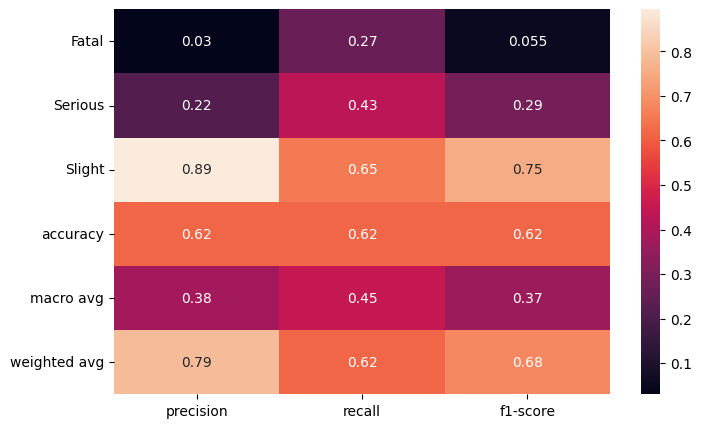

In [69]:
clf_report = classification_report(true_values,
                                   predictions,
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)
plt.figure(figsize=(8,5))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
#plt.savefig("xgb_selected_features_class_report.png")
plt.show()

Comment : We have a lower score,lets try feature selection with mutual information

#### Feature Selection with Mutual_information

In [71]:
#Feature selcetion
from sklearn.feature_selection import mutual_info_classif
X = data.drop("Accident_Severity",axis = 1)
Y = data["Accident_Severity"]
splitter = StratifiedShuffleSplit(n_splits=5,random_state = 42,test_size=0.2)
for train,test in splitter.split(X,Y):
    x_train = X.loc[train]
    y_train = Y.loc[train] - 1
    x_test = X.loc[test] 
    y_test = Y.loc[test]- 1 

def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x_train, y_train)
mi_scores[::3]  # show a few features with their MI scores"""

Did_Police_Officer_Attend_Scene_of_Accident    0.018928
Urban_or_Rural_Area                            0.014581
Speed_limit                                    0.011006
Road_Surface_Conditions                        0.010533
Location_Northing_OSGR                         0.009050
Junction_Detail                                0.006966
Longitude                                      0.006269
Hour                                           0.002578
Pedestrian_Crossing-Human_Control              0.001699
Carriageway_Hazards                            0.000000
Name: MI Scores, dtype: float64

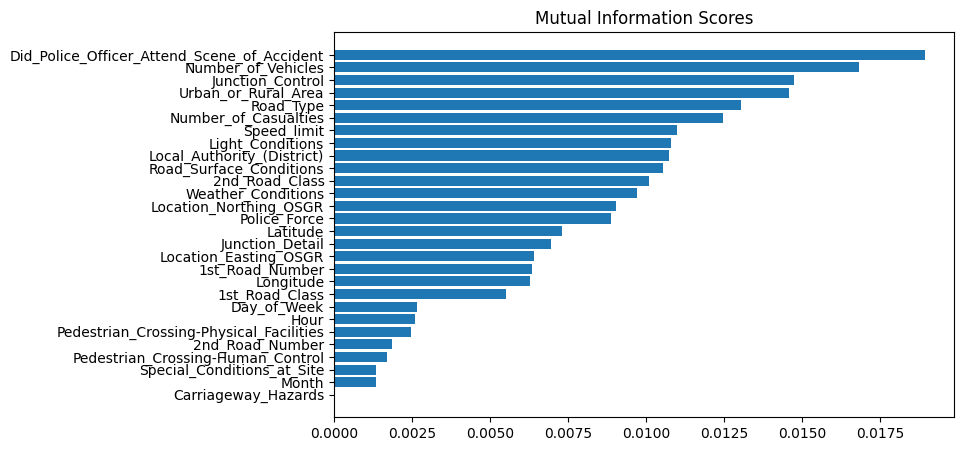

In [72]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [99]:
# Select top 15 features
from sklearn.feature_selection import SelectKBest
def select_top(data,number):
    X = data.drop("Accident_Severity",axis = 1)
    Y = data["Accident_Severity"]
    splitter = StratifiedShuffleSplit(n_splits=5,random_state = 42,test_size=0.2)
    for train,test in splitter.split(X,Y):
        x_train = X.loc[train]
        y_train = Y.loc[train] - 1
        x_test = X.loc[test] 
        y_test = Y.loc[test]- 1
        select_top_ = SelectKBest(mutual_info_classif,k=number)
        select_top_.fit(x_train,y_train)
        selected_features = x_train.columns[select_top_.get_support()]
    return selected_features
top_25=select_top(data,25)

In [100]:
top_25

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Carriageway_Hazards', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Hour', 'Month'],
      dtype='object')

In [107]:
with open('top_25_mi.npy', 'wb') as f:
    np.save(f,top_25)
    
"""with open('test.npy', 'rb') as f:
    a = np.load(f)
    b = np.load(f)
print(a, b)

with open('.npy', 'wb') as f:
    np.save(f, np.array([1, 2]))"""

"with open('test.npy', 'rb') as f:\n    a = np.load(f)\n    b = np.load(f)\nprint(a, b)\n\nwith open('.npy', 'wb') as f:\n    np.save(f, np.array([1, 2]))"

## Traning xgboost with top 25 columns from mutual information

In [101]:
## Traning xgboost with top 25 columns from mutual information
data = df.copy()
xgb_top_25_mi,predictions,true_values = train_model_selected_features(data,model,top_25)

In [102]:
from sklearn.metrics import classification_report
cp = classification_report(true_values,predictions)
print(cp)  

              precision    recall  f1-score   support

           0       0.29      0.02      0.05       323
           1       0.37      0.02      0.04      4008
           2       0.85      0.99      0.92     23681

    accuracy                           0.84     28012
   macro avg       0.50      0.35      0.33     28012
weighted avg       0.77      0.84      0.78     28012



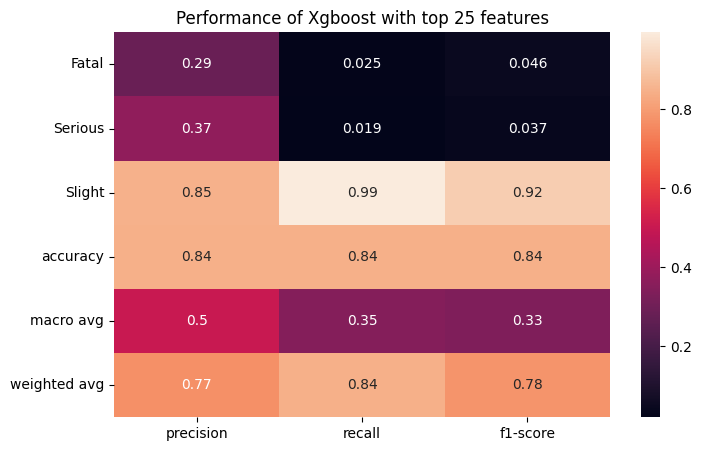

In [105]:
clf_report = classification_report(true_values,
                                   predictions,
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)
plt.figure(figsize=(8,5))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.title("Performance of Xgboost with top 25 features")
plt.savefig("xgb_selected_features_25_class_report.png")
plt.show()

In [106]:
with open('xgb_top_25_features.pkl', 'wb') as files:
    pickle.dump(xgb_top_25_mi, files)

Text(0.5, 1.0, 'Confusion matrix of the classifier')

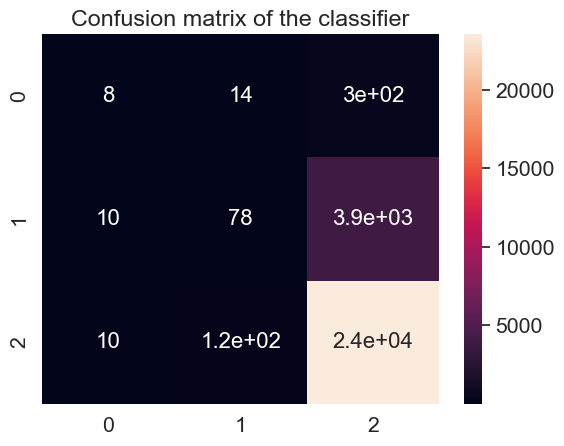

In [122]:
#plot confusionmatrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_values,predictions)
labels = ['Fatal', 'Serious',"Slight"]
plt.xlabel('Predicted')
plt.ylabel('True')
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size


plt.title('Confusion matrix of the classifier')
plt
#plt.show()

In [ ]:
### Preprocessing and getting the minimum and maximum for the purpose of making single prediction

In [55]:
### Get how data is preprocessde
dt = pd.read_csv("processed_df.csv")
dt.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month
0,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,2,12,...,0,4,1,1,0,0,1,1,16,1
1,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,2,12,...,0,1,1,1,0,0,1,1,17,1
2,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,2,12,...,1,4,2,2,0,0,1,1,16,1
3,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,3,12,...,0,1,1,2,0,0,1,2,17,1
4,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,6,12,...,5,1,2,2,0,0,1,2,17,1


In [56]:
dt.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Hour', 'Month'],
      dtype='object')

In [50]:
dt.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month
count,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,...,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000
mean,447827.034436,283159.068930,-1.318349,52.436849,29.902046,2.833852,1.841014,1.329390,4.094962,343.648905,...,0.838807,1.952041,1.511531,1.298866,0.098839,0.061754,1.342549,1.198506,11.650647,6.631697
std,93486.685943,147062.961595,1.374770,1.325850,25.217637,0.402020,0.710046,0.795427,1.911279,258.438367,...,1.931975,1.653867,1.519799,0.554714,0.697925,0.574448,0.474564,0.405991,6.508139,3.429448
min,173944.000000,10628.000000,-5.280261,49.915618,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,0.000000,1.000000
25%,386460.000000,176640.000000,-2.204238,51.475224,6.000000,3.000000,1.000000,1.000000,2.000000,104.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,6.000000,4.000000
50%,451460.000000,240886.000000,-1.236156,52.051875,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,12.000000,7.000000
75%,526760.000000,388030.000000,-0.172579,53.386988,45.000000,3.000000,2.000000,1.000000,6.000000,517.000000,...,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000,17.000000,10.000000
max,655282.000000,712921.000000,1.758443,56.323221,98.000000,3.000000,37.000000,38.000000,7.000000,941.000000,...,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,2.000000,3.000000,22.000000,12.000000


In [39]:

splitter = StratifiedShuffleSplit(n_splits=5,random_state = 42,test_size=0.2)

X = dt.drop("Accident_Severity",axis = 1)
Y = dt["Accident_Severity"]
for train,test in splitter.split(X,Y):
    x_train = X.loc[train]
    y_train = Y.loc[train] - 1
    x_test = X.loc[test] 
    y_test = Y.loc[test]-1
undersample = RandomUnderSampler()
oversample = SMOTE()
steps = [("o",oversample),("u",undersample)]
pipeline = Pipeline(steps = steps)
x,y = pipeline.fit_resample(x_train,y_train)


In [40]:
x.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month
0,318280.0,178056.0,-3.178566,51.495517,62,2,2,5,741,3,...,0,1,1,1,0,0,1,1,0,9
1,406336.0,440559.0,-1.905147,53.861214,13,2,3,5,200,6,...,0,4,2,2,0,0,1,1,5,12
2,392820.0,287920.0,-2.107170,52.489146,20,2,2,3,303,3,...,0,1,1,1,0,0,1,1,16,6
3,327920.0,546730.0,-3.123032,54.810228,3,3,2,6,60,4,...,0,6,1,2,0,0,2,1,18,11
4,297405.0,637169.0,-3.630529,55.617254,97,1,1,5,938,3,...,0,1,1,1,0,0,2,1,2,5


In [35]:
selected = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Carriageway_Hazards', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Hour', 'Month']

In [41]:
x = x[selected]
x.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,...,2nd_Road_Class,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month
0,318280.0,178056.0,-3.178566,51.495517,62,2,2,5,741,3,...,6,0,1,1,1,0,1,1,0,9
1,406336.0,440559.0,-1.905147,53.861214,13,2,3,5,200,6,...,-1,0,4,2,2,0,1,1,5,12
2,392820.0,287920.0,-2.107170,52.489146,20,2,2,3,303,3,...,6,0,1,1,1,0,1,1,16,6
3,327920.0,546730.0,-3.123032,54.810228,3,3,2,6,60,4,...,6,0,6,1,2,0,2,1,18,11
4,297405.0,637169.0,-3.630529,55.617254,97,1,1,5,938,3,...,6,0,1,1,1,0,2,1,2,5


In [42]:
features_to_log = ['Location_Easting_OSGR','Location_Northing_OSGR',"Latitude"]
for i in features_to_log:
    x[i] = np.log(x[i])

In [43]:
x.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,...,2nd_Road_Class,2nd_Road_Number,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Hour,Month
0,12.670687,12.089853,-3.178566,3.941495,62,2,2,5,741,3,...,6,0,1,1,1,0,1,1,0,9
1,12.914936,12.995800,-1.905147,3.986411,13,2,3,5,200,6,...,-1,0,4,2,2,0,1,1,5,12
2,12.881107,12.570438,-2.107170,3.960606,20,2,2,3,303,3,...,6,0,1,1,1,0,1,1,16,6
3,12.700525,13.211710,-3.123032,4.003877,3,3,2,6,60,4,...,6,0,6,1,2,0,2,1,18,11
4,12.602850,13.364790,-3.630529,4.018493,97,1,1,5,938,3,...,6,0,1,1,1,0,2,1,2,5


In [45]:
x["Location_Easting_OSGR"].min()

12.066488687314894

In [47]:
minmax_dic = {}
def get_min_max_feature(x):
    for col in x.columns:
        min_max = []
        maximum = x[col].max()
        minimum = x[col].min()
        min_max.append(maximum)
        min_max.append(minimum)
        minmax_dic[col] = min_max
get_min_max_feature(x)

In [59]:
minmax_dic

{'Location_Easting_OSGR': [13.392424101839591, 12.066488687314894],
 'Location_Northing_OSGR': [13.477125893818732, 9.271247306879705],
 'Longitude': [1.754871, -5.280261],
 'Latitude': [4.031106901265577, 3.9103339397595254],
 'Police_Force': [98, 1],
 'Number_of_Vehicles': [37, 1],
 'Number_of_Casualties': [38, 1],
 'Day_of_Week': [7, 1],
 'Local_Authority_(District)': [941, 1],
 '1st_Road_Class': [6, 1],
 '1st_Road_Number': [9914, 0],
 'Road_Type': [9, 1],
 'Speed_limit': [70, 0],
 'Junction_Detail': [9, -1],
 'Junction_Control': [4, -1],
 '2nd_Road_Class': [6, -1],
 '2nd_Road_Number': [9999, -1],
 'Light_Conditions': [7, 1],
 'Weather_Conditions': [9, 1],
 'Road_Surface_Conditions': [5, -1],
 'Carriageway_Hazards': [7, -1],
 'Urban_or_Rural_Area': [2, 1],
 'Did_Police_Officer_Attend_Scene_of_Accident': [3, -1],
 'Hour': [22, 0],
 'Month': [12, 1]}

In [60]:
import pickle
with open('min_max_dic.json', 'wb') as fp:
     pickle.dump(minmax_dic, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [66]:
def scale_value(feature_name,value,dic =minmax_dic ):
    maximum = dic[feature_name][0]
    minimum = dic[feature_name][1]
    scaled_value = (value - minimum)/(maximum - minimum)
    return scaled_value
    

In [67]:
scale_value("Month",12)

1.0